# Multiclass Classification using SoftMax regression

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
data = pd.read_csv("train.csv")
data = np.array(data)
m,n = data.shape
np.random.shuffle(data) # shuffle the data before splitting into train and test sets

In [38]:
m,n

(42000, 785)

In [39]:
# Spliting the data for training and testing purposes
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev/255

data_train = data[1000:m].T 
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255

In [40]:
# Now we initialize the parameters of the model
# We chose a normal distribution of random parameters between -0.5 to 0.5
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1)  - 0.5
    W2 = np.random.rand(10,10)  - 0.5
    b2 = np.random.rand(10,1)  - 0.5
    return W1, b1, W2, b2 

#Defining the activation functions
def relu(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z)/ sum(np.exp(Z))
    return A

#Forward Propagation
def forward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X) + b1
    A1 = relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1,A1,Z2,A2

#Defining the derivative of the activation function
def relu_deriv(Z):
    return Z > 0

# Matching the matrix of X and Y
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y] = 1
    one_hot_Y = one_hot_Y.T 
    return one_hot_Y

#Back Propagation
def back_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * relu_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

#updating parameters
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


In [41]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X,Y,alpha,iterations):
    W1,b1,W2,b2=init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0: #Get the acccuracy every 50 iterations
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print("Accuracy: ",get_accuracy(predictions, Y))
    return W1, b1, W2, b2 

In [42]:
W1,b1,W2,b2 = gradient_descent(X_train,Y_train,0.1,500)

Iteration:  0
[2 6 0 ... 2 0 0] [6 2 7 ... 8 7 3]
Accuracy:  0.11885365853658536


Iteration:  50
[0 6 7 ... 0 0 0] [6 2 7 ... 8 7 3]
Accuracy:  0.299
Iteration:  100
[2 8 7 ... 8 7 2] [6 2 7 ... 8 7 3]
Accuracy:  0.5020975609756098
Iteration:  150
[6 8 9 ... 8 7 3] [6 2 7 ... 8 7 3]
Accuracy:  0.6373658536585366
Iteration:  200
[6 8 7 ... 8 7 3] [6 2 7 ... 8 7 3]
Accuracy:  0.7114146341463414
Iteration:  250
[6 8 7 ... 8 7 3] [6 2 7 ... 8 7 3]
Accuracy:  0.7562439024390244
Iteration:  300
[6 8 7 ... 8 7 3] [6 2 7 ... 8 7 3]
Accuracy:  0.7844146341463415
Iteration:  350
[6 8 7 ... 8 7 3] [6 2 7 ... 8 7 3]
Accuracy:  0.8045365853658537
Iteration:  400
[6 8 7 ... 8 7 3] [6 2 7 ... 8 7 3]
Accuracy:  0.8186585365853658
Iteration:  450
[6 8 7 ... 8 7 3] [6 2 7 ... 8 7 3]
Accuracy:  0.8309756097560975


In [43]:
def make_predictions(X, W1, b1, W2, b2):
    Z1,A1,Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


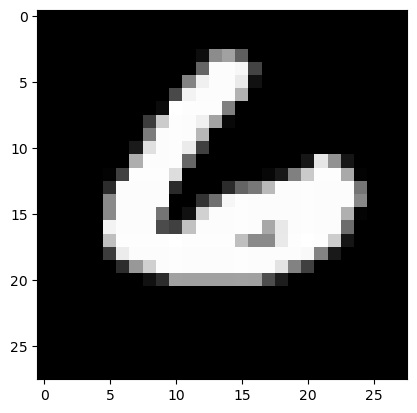

Prediction:  [8]
Label:  2


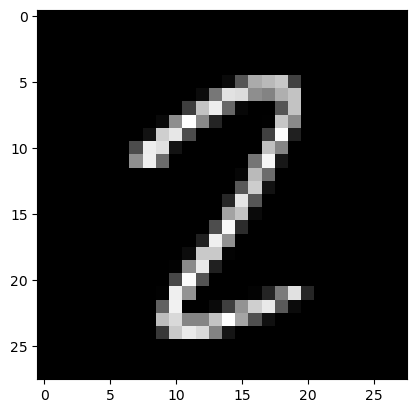

Prediction:  [7]
Label:  7


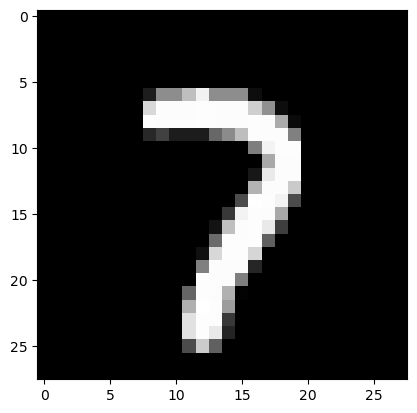

Prediction:  [5]
Label:  5


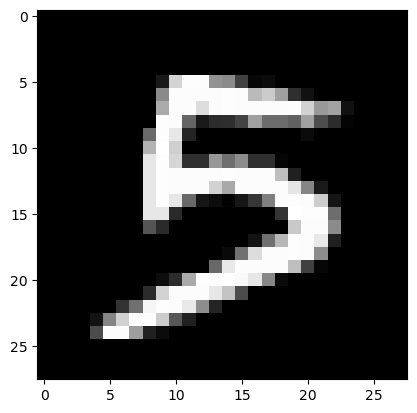

In [44]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [45]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[7 0 3 8 5 7 5 0 4 0 8 1 1 3 7 0 1 2 3 1 2 8 0 9 7 7 7 0 8 0 5 1 7 0 2 9 1
 2 6 3 3 1 5 0 7 2 9 9 5 6 4 6 2 7 7 9 6 5 9 2 5 1 0 9 5 4 9 9 6 7 2 7 5 8
 0 7 0 1 1 2 9 1 8 0 5 4 5 5 3 6 8 3 6 4 3 2 5 7 5 4 5 8 1 6 2 8 1 5 7 3 2
 6 8 7 7 8 1 3 1 7 8 5 7 8 1 3 4 0 4 4 9 5 8 8 4 9 8 5 5 3 7 1 1 1 4 4 7 2
 2 1 3 9 9 2 9 5 9 9 1 2 6 3 0 8 7 8 8 8 7 8 0 4 9 4 0 6 6 1 4 6 9 4 5 1 2
 3 2 6 1 2 4 1 3 8 3 4 9 4 2 4 9 5 6 1 2 7 9 6 8 7 8 3 9 5 7 6 1 8 1 5 2 6
 7 0 3 1 5 0 2 4 8 4 8 8 2 0 2 6 1 5 0 1 3 2 9 0 9 3 1 4 9 9 1 9 6 1 2 6 7
 2 1 4 2 3 1 4 9 4 5 1 4 9 1 9 2 5 6 0 7 8 7 9 4 7 3 9 5 4 9 2 1 7 9 1 7 0
 9 1 7 4 1 0 9 0 9 5 6 7 6 6 5 1 2 6 9 1 0 2 0 7 4 1 5 7 4 0 6 3 2 0 1 1 7
 9 8 8 2 2 0 0 5 3 7 7 4 0 1 3 1 1 2 7 6 8 6 9 0 7 0 5 2 1 4 1 7 2 2 1 3 3
 3 6 3 2 5 4 5 2 9 4 9 3 4 6 2 3 2 3 4 2 1 4 6 7 6 3 3 2 2 6 2 8 7 2 0 7 1
 1 8 3 2 7 5 6 2 2 4 2 5 9 1 4 5 5 1 7 6 7 4 7 4 4 0 1 0 1 5 3 9 0 0 8 6 1
 2 6 2 1 5 5 7 4 3 6 8 3 9 6 0 1 4 7 9 7 5 6 2 4 9 9 9 6 2 9 0 5 9 4 1 9 0
 0 1 1 1 1 1 7 7 9 6 8 5 

0.829